# Make Flying Safer by Choosing the Right Plane

![How-to-Choose](./images/cessna_vs_piper.jpg)

## Overview
This project analyzes the risks associated with specific make and model aircraft. A descriptive analysis of aviation accident data reveals variations in the frequency of fatal incidents among different planes. Additionally, it offers insights into the timing patterns of accidents throughout the year and highlights specific geographical regions within the continental U.S. where airplane accidents are more prevalent. Our recently established aviation school can leverage this analysis to make informed decisions on aircraft investments, pinpoint suitable locations for our operations, and develop well-timed lesson schedules.

## Business Problem
Our company is embarking on establishing a new flight school, with a primary focus on ensuring the safety of our students and bringing up a new generation of pilots. Our business will be broken into two stages for our students. First, the instructional phase where students will learn how to fly with instructor assistance. Second, the rental phase where after completing stage 1, students will be able to rent planes to log solo flight hours to gain their pilot's license. To make informed decisions about the selection of aircraft for our training and rental fleet, we need a clear and visually insightful way to compare the safety records of different aircraft models.

We will specifically investigate the most commonly used aircraft in flight schools. According to the [Pilot Institute](https://pilotinstitute.com/flight-school-aircraft/) and the [Aircraft Owners and Pilots Association](https://www.aopa.org/training-and-safety/learn-to-fly/flying-for-fun/choose-where-to-train/training-aircraft-review#:~:text=Cessna%20172%3A%20The%20Cessna%20172,%2Dinjected%20four%2Dcylinder%20engines.), the top aircraft make and models used in flight school are the Cessna 172, Piper PA-28 Cherokee, Cessna 150, and Cessna 152.

### Cessna 172
![Cessna 172](./images/cessna_172.jpg)

### Piper PA-28 Cherokee
![Piper_pa28](./images/piper_pa28.jpg)

### Cessna 150
![Cessna 150](./images/cessna_150.jpg)

### Cessna 152
![Cessna 152](./images/cessna_152.jpg)

**The Task:**
1. Which of these makes and models is the safest to fly?
2. What time of year provides for the safest flying conditions?
3. Where should we open our first location?


## Data Understanding

In this analysis, aviation accident data was taken from the [National Transportation Safety Board](https://www.kaggle.com/datasets/khsamaha/aviation-accident-database-synopses/data?select=AviationData.csv) and was sourced from Kaggle. This aviation accident database, encompassing data from 1962 onwards, provides comprehensive information on civil aviation accidents and selected incidents within the United States, its territories, possessions, and international waters. The dataset includes details about the number of injuries and survivors resulting from each incident, along with information about the make and model of the involved aircraft.

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
# Load in data
df=pd.read_csv('Data/AviationData.csv', encoding='latin-1', low_memory=False)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50249 non-null  object 
 9   Airport.Name            52790 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87572 non-null  object 
 14  Make                    88826 non-null

In [4]:
df.describe()

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
count,82805.000000,77488.000000,76379.000000,76956.000000,82977.000000
mean,1.146585,0.647855,0.279881,0.357061,5.325440
std,0.446510,5.485960,1.544084,2.235625,27.913634
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,0.000000,0.000000,2.000000
max,8.000000,349.000000,161.000000,380.000000,699.000000


In [5]:
df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [6]:
#Here we are turning the Event.Date column into a easier to work with datetime object.
df['Event.Date'] = pd.to_datetime(df['Event.Date'])
df['Event.Date'].describe()

count                   88889
unique                  14782
top       1982-05-16 00:00:00
freq                       25
first     1948-10-24 00:00:00
last      2022-12-29 00:00:00
Name: Event.Date, dtype: object

In [7]:
df['Location'].value_counts()

ANCHORAGE, AK         434
MIAMI, FL             200
ALBUQUERQUE, NM       196
HOUSTON, TX           193
CHICAGO, IL           184
                     ... 
Ware Shoals, SC         1
San Lorenzon, Peru      1
ANTONIO, CO             1
CHINA, ME               1
MACKSVILLE, KS          1
Name: Location, Length: 27758, dtype: int64

In [8]:
df['Country'].value_counts()

United States               82248
Brazil                        374
Canada                        359
Mexico                        358
United Kingdom                344
                            ...  
Bosnia And Herzegovina          1
Turks and Caicos Islands        1
French Guiana                   1
Chad                            1
Corsica                         1
Name: Country, Length: 219, dtype: int64

In [9]:
df['Aircraft.Category'].value_counts()

Airplane             27617
Helicopter            3440
Glider                 508
Balloon                231
Gyrocraft              173
Weight-Shift           161
Powered Parachute       91
Ultralight              30
Unknown                 14
WSFT                     9
Powered-Lift             5
Blimp                    4
UNK                      2
Rocket                   1
ULTR                     1
Name: Aircraft.Category, dtype: int64

In [10]:
df['Make'].value_counts()

Cessna               22227
Piper                12029
CESSNA                4922
Beech                 4330
PIPER                 2841
                     ...  
BULFER JAMES G           1
Marvin T Eiland          1
MULLOY CHARLES           1
Morgan, Marvin R.        1
Doyle                    1
Name: Make, Length: 8237, dtype: int64

In [11]:
df['Model'].value_counts()

152               2367
172               1756
172N              1164
PA-28-140          932
150                829
                  ... 
CHALLENGER TWO       1
W8 Tailwind          1
LSIF SAILPLANE       1
TU-10                1
ROTORWAY 152         1
Name: Model, Length: 12318, dtype: int64

In [12]:
df['Injury.Severity'].value_counts()

Non-Fatal     67357
Fatal(1)       6167
Fatal          5262
Fatal(2)       3711
Incident       2219
              ...  
Fatal(156)        1
Fatal(189)        1
Fatal(21)         1
Fatal(56)         1
Fatal(256)        1
Name: Injury.Severity, Length: 109, dtype: int64

## Data Preparation

### Data Cleaning

For the aviation accident dataset, we are making it easier to work with by investigating and cleaning up certain columns and dropping unnecessary columns.

First, we want to identify locations that are only applicable to where we would operate, The continental United States.

In [13]:
#First lets drop rows we don't have have information on the location:
#The location includes infomation about where in the Country the accident occured.
df.dropna(subset=['Location', 'Country'], inplace=True)

# Now we only want to view locations that are apart of the continental United States.
df = df[df['Country'].str.lower() == 'united states']

Now let's drop rows where we do not have information on the make or model of the aircraft. We want to identify which plane is the best investment and can't do so if this info is missing.

In [14]:
#Dropping rows if the make or model is missing.
df.dropna(subset=['Make', 'Model'], inplace=True)

Given this dataset includes a lot of unnecessary columns, we will drop columns that we will not further analyze.

In [15]:
# Columns to drop
drop_columns = ['Event.Id', 'Investigation.Type', 'Accident.Number', 'Latitude', 'Longitude', 'Airport.Code', 'Airport.Name',
                'Registration.Number', 'FAR.Description', 'Schedule', 'Air.carrier','Report.Status', 'Publication.Date']
# Drop columns in the specified list
df = df.drop(columns=drop_columns)

Now we will extract the year and the month values from the `Event.Date` column. This will allow us to determine what time of the year is safest to fly.

In [16]:
# Extracting year and month from Event.Date
df['year'] = df['Event.Date'].dt.year
df['month'] = df['Event.Date'].dt.month_name()

Next, let's make the Make and Model values more consistent to account for any differences in spelling. For example, in the Make column, Cessna sometimes appears in all uppercase letters (CESSNA).

In [17]:
# Here we are making the 'Make' column consistent
df['Make']=df['Make'].str.lower()

In [18]:
# Here we are making the 'Model' column consistent by removing spaces, -, and _.
# Function to process a single value
def process_category(value):
    # Convert to lowercase, remove spaces, dashes, and underscores, and combine all words
    return ''.join(value.lower().replace(' ', '').replace('-', '').replace('_', ''))

df['Model'] = df['Model'].apply(process_category)

 Now we can create a new column where make and model are combined. This will be helpful in the next line of code.

In [19]:
# Here we are creating a new column that combines Make and Model
df['Make/Model'] = df['Make']+" "+df['Model']
df['Make/Model'].value_counts()

cessna 152                          2322
cessna 172                          1634
cessna 172n                         1144
piper pa28140                        978
cessna 172m                          802
                                    ... 
piper j3c75                            1
thomas stephen glasairsuperiirg        1
fairchild heli-porter pilatuspc6       1
barness pulsari                        1
wells pittss2s                         1
Name: Make/Model, Length: 14886, dtype: int64

Originally, in code block 9, there were only 27617 rows that were classified as airplanes. Here we will use the Make/Model column to see if we can identify any other aircraft that share the same make and model. As a result, we were able to identify ~40,000 new airplanes in the dataset.

In [20]:
#Here we are seeing if the make/model for a specific aircraft category matches another row where aircraft category is null.
'''
1. df['Aircraft.Category'].isna(): 
This part creates a boolean mask where it checks if the values in the 'Aircraft.Category' column are NaN. 
It returns True for NaN values and False otherwise.

2. df['Make/Model'].isin(df[df['Aircraft.Category'] == 'Airplane']['Make/Model']): 
This part creates another boolean mask. It checks if the values in the 'Make/Model' 
column are present in the 'Make/Model' column of rows where 'Aircraft.Category' is equal to 'Airplane'. 
It returns True for rows where the 'Make/Model' is in the list of 'Make/Model' values for 'Airplane'.

3. mask = df['Aircraft.Category'].isna() & ...: 
This line combines the two boolean masks using the bitwise AND (&) operator. 
The resulting mask will be True for rows where 'Aircraft.Category' is NaN and the corresponding 'Make/Model' 
is in the list of 'Make/Model' values for 'Airplane'.
'''
Airplane_mask = df['Aircraft.Category'].isna() & df['Make/Model'].isin(df[df['Aircraft.Category'] == 'Airplane']['Make/Model'])
Helicopter_mask = df['Aircraft.Category'].isna() & df['Make/Model'].isin(df[df['Aircraft.Category'] == 'Helicopter']['Make/Model'])
Glider_mask = df['Aircraft.Category'].isna() & df['Make/Model'].isin(df[df['Aircraft.Category'] == 'Glider']['Make/Model'])
Balloon_mask = df['Aircraft.Category'].isna() & df['Make/Model'].isin(df[df['Aircraft.Category'] == 'Balloon']['Make/Model'])
Gyrocraft_mask = df['Aircraft.Category'].isna() & df['Make/Model'].isin(df[df['Aircraft.Category'] == 'Gyrocraft']['Make/Model'])
WeightShift_mask = df['Aircraft.Category'].isna() & df['Make/Model'].isin(df[df['Aircraft.Category'] == 'Weight-Shift']['Make/Model'])
PoweredParachute_mask = df['Aircraft.Category'].isna() & df['Make/Model'].isin(df[df['Aircraft.Category'] == 'Powered Parachute']['Make/Model'])
Ultralight_mask = df['Aircraft.Category'].isna() & df['Make/Model'].isin(df[df['Aircraft.Category'] == 'Ultralight']['Make/Model'])
Unknown_mask = df['Aircraft.Category'].isna() & df['Make/Model'].isin(df[df['Aircraft.Category'] == 'Unknown']['Make/Model'])
WSFT_mask = df['Aircraft.Category'].isna() & df['Make/Model'].isin(df[df['Aircraft.Category'] == 'WSFT']['Make/Model'])
PoweredLift_mask = df['Aircraft.Category'].isna() & df['Make/Model'].isin(df[df['Aircraft.Category'] == 'Powered-Lift']['Make/Model'])
Blimp_mask = df['Aircraft.Category'].isna() & df['Make/Model'].isin(df[df['Aircraft.Category'] == 'Blimp']['Make/Model'])
UNK_mask = df['Aircraft.Category'].isna() & df['Make/Model'].isin(df[df['Aircraft.Category'] == 'UNK']['Make/Model'])
ULTR_mask = df['Aircraft.Category'].isna() & df['Make/Model'].isin(df[df['Aircraft.Category'] == 'ULTR']['Make/Model'])
Rocket_mask = df['Aircraft.Category'].isna() & df['Make/Model'].isin(df[df['Aircraft.Category'] == 'Rocket']['Make/Model'])

#Here we are applying the condition above, and reclassfying the Aircraft category if there was a match.
df.loc[Airplane_mask, 'Aircraft.Category'] = 'Airplane'
df.loc[Helicopter_mask, 'Aircraft.Category'] = 'Helicopter'
df.loc[Glider_mask, 'Aircraft.Category'] = 'Glider'
df.loc[Balloon_mask, 'Aircraft.Category'] = 'Balloon'
df.loc[Gyrocraft_mask, 'Aircraft.Category'] = 'Gyrocraft'
df.loc[WeightShift_mask, 'Aircraft.Category'] = 'Weight-Shift'
df.loc[PoweredParachute_mask, 'Aircraft.Category'] = 'Powered Parachute'
df.loc[Ultralight_mask, 'Aircraft.Category'] = 'Ultralight'
df.loc[Unknown_mask, 'Aircraft.Category'] = 'Unknown'
df.loc[WSFT_mask, 'Aircraft.Category'] = 'WSFT'
df.loc[PoweredLift_mask, 'Aircraft.Category'] = 'Powered-Lift'
df.loc[Blimp_mask, 'Aircraft.Category'] = 'Blimp'
df.loc[UNK_mask, 'Aircraft.Category'] = 'UNK'
df.loc[ULTR_mask, 'Aircraft.Category'] = 'ULTR'
df.loc[Rocket_mask, 'Aircraft.Category'] = 'Rocket'

# New value count of Airplanes, we were able to classify ~40k new airplanes, that were previously NA
df['Aircraft.Category'].value_counts()

Airplane             64012
Helicopter            6487
Glider                1024
Balloon                433
Gyrocraft              217
Weight-Shift           162
Powered Parachute       91
Ultralight              32
Unknown                 15
WSFT                    11
Powered-Lift             7
Blimp                    5
Rocket                   1
ULTR                     1
Name: Aircraft.Category, dtype: int64

In [21]:
#Investigating the unknown aircraft category by make and model, to find any aircrafts.
unknown_aircraft_df = df[df['Aircraft.Category']=='Unknown']
unknown_aircraft_df['Make/Model'].value_counts()

mitsubishi mu300        8
rans s7                 3
quad city challenger    3
varieze ruatan          1
Name: Make/Model, dtype: int64

Since none of these aircraft are the Cessna 150/152/172 or Piper Pa-28 models. We can ignore this category and drop these values when the time comes.

Now we will investigate the remaining null values. Just to be safe, if Cessna or Piper show up in this category, we will reclassify their category type as an airplane. Later, we will see how we can potentially capture more of these models of interest.

In [22]:
None_aircraft_df = df[df['Aircraft.Category'].isna()]
None_aircraft_df['Make'].value_counts()

boeing               440
cessna               317
beech                317
piper                255
mcdonnell douglas    142
                    ... 
bastian                1
walter w. bell         1
guzzino, p.a.          1
humer                  1
finke                  1
Name: Make, Length: 3942, dtype: int64

In [23]:
#Here we are assigning the variable 'airplane' to well known airplane manufactures that dont have a aircraft classification.
df.loc[(df['Aircraft.Category'].isna()) & (df['Make'] == 'cessna'), 'Aircraft.Category'] = 'Airplane'
df.loc[(df['Aircraft.Category'].isna()) & (df['Make'] == 'piper'), 'Aircraft.Category'] = 'Airplane'

Now we can drop all rows where the Aircraft category is not equal to Airplane.

In [24]:
#Dropping unneeded rows. 
airplane_df = df[df['Aircraft.Category'] == 'Airplane']

Now we are investigating the injury severity. As a flight school, our students' safety is our top priority, and we want to make sure our students are in the safest plane on the market. To determine whether a plane is safe or not, we need to examine the survival rate, by analyzing the four injury columns (`Total.Fatal.Injuries`, `Total.Serious.Injuries`, `Total.Minor.Injuries`, and `Total.Uninjured`).

We will first check for instance where the injury severity value is NA. As shown below, since the sum of the four injury categories is equal to zero, this means that we have no information as to how many passengers are onboard. We will therefore remove these rows.

In [25]:
#Now we are investigating the NaN injurity serverity columns.
filtered_df = airplane_df[airplane_df['Injury.Severity'].isnull()]

# Here I am checking to make sure there are no injuries recorded in these rows.
print(filtered_df['Total.Fatal.Injuries'].sum() == 0)
print(filtered_df['Total.Serious.Injuries'].sum() == 0)
print(filtered_df['Total.Minor.Injuries'].sum() == 0)
print(filtered_df['Total.Uninjured'].sum() == 0)

#Drop rows where the Injury Severity is NA, since we have no accounts of anybody being onboard.
airplane_df =airplane_df.dropna(subset=['Injury.Severity'])

True
True
True
True


Now, we will do the same thing, but drop rows where all four injury types are filled with a null value.

In [26]:
#I'm dropping rows, where there is no information to how many passangers were on board.  
columns_to_check = ['Total.Fatal.Injuries','Total.Serious.Injuries','Total.Minor.Injuries','Total.Uninjured']
airplane_df.dropna(subset=columns_to_check, how='all', inplace=True)

Now that we are left with rows that contain at least one value in one of the four injury-type columns, we can replace the null values with zero.

In [27]:
#Now that one of the four 'columns_to_check' has a value in it, We replace those NA values with 0
airplane_df[columns_to_check] = airplane_df[columns_to_check].fillna(0)

Lastly, let's remove all rows where the columns of interest are all equal to zero as again this is a case where we have no information as to how many people were on board.

In [28]:
#Creating a boolean list to identify rows where all the columns to check are equal to zero.
zero_values_mask = (airplane_df[columns_to_check] == 0).all(axis=1)

# Drop the rows based on the boolean mask
airplane_df = airplane_df[~zero_values_mask]

Now we can investigate the amateur build column. We do not want to include aircrafts that are built by amateurs, so we will exclude all those rows.

In [29]:
# First I will investigate the NA values in this column, and if the make/model matches another rows make/model, 
# replace NA value.

no_amatuer_mask = airplane_df['Amateur.Built'].isna() & airplane_df['Make/Model'].isin(airplane_df[airplane_df['Amateur.Built'] == 'No']['Make/Model'])
yes_amatuer_mask = airplane_df['Amateur.Built'].isna() & airplane_df['Make/Model'].isin(airplane_df[airplane_df['Amateur.Built'] == 'Yes']['Make/Model'])
airplane_df.loc[no_amatuer_mask, 'Amateur.Built'] = 'No'
airplane_df.loc[yes_amatuer_mask, 'Amateur.Built'] = 'Yes'

# Now I'm gonna remove all rows where Amatuer built is = yes or null
condition = (airplane_df['Amateur.Built'] == 'Yes') | airplane_df['Amateur.Built'].isnull()
airplane_df = airplane_df[~condition]

In [30]:
#Checking to make sure we have No as the only option.
airplane_df['Amateur.Built'].value_counts()

No    61015
Name: Amateur.Built, dtype: int64

In [31]:
airplane_df['Make'].value_counts()

cessna                           25747
piper                            14122
beech                             4722
mooney                            1243
grumman                           1071
                                 ...  
swift museum foundation, inc.        1
michael j robbins                    1
clark                                1
evektor aerotechnik as               1
kuykendall charles                   1
Name: Make, Length: 1008, dtype: int64

I want to make sure we capture all instances of the Cessna and Piper models of interest. The make for Cessna could be spelled slightly differently. For example, 'Cessna airplane company' or 'Piper aviation', so we want to make sure those are renamed to Cessna or Piper.

I also want to check for other common names of the models of interest. The Cessna 172 is also commonly known as the Cessna Skyhawk, so we will want to check for instances where the model’s name is named Skyhawk.

Lastly, I want to create a common model name for the Cessna and Piper models. Like cars, there are different versions of a specific aircraft. We will just aggregate these different versions together and view the incidents for each model as a whole.

In [32]:
#Here I am making sure the make values for pipper and cessna is consistent throught the dataframe.
airplane_df.loc[airplane_df['Make'].str.contains('piper', case=False, na=False), 'Make'] = 'piper'
airplane_df.loc[airplane_df['Make'].str.contains('cessna', case=False, na=False), 'Make'] = 'cessna'
airplane_df['Make'].value_counts()

cessna                           25782
piper                            14171
beech                             4722
mooney                            1243
grumman                           1071
                                 ...  
swift museum foundation, inc.        1
kolb aircraft inc                    1
michael j robbins                    1
clark                                1
gippsaero pty ltd                    1
Name: Make, Length: 988, dtype: int64

In [33]:
# To make sure we capture all the models of interest, the cessna 172 is also commonly known as “The Cessna Skyhawk”. 
# Below we replace the model name with 172 if Skyhawk occurs in the model number.
airplane_df.loc[airplane_df['Model'].str.contains('Skyhawk', case=False, na=False), 'Model'] = '172'

In [34]:
'''
Here I am creating a new column to classify all versions of the Pipper pa-28, cessna 152, cessna 150, and cessna 172 
so that we can aggregate each model together. We will leave the original model column unchanged to later analysis the
differences between different versions, if needed.

For example: cessna 150n vs cessna 150m
'''
make_column = 'Make'
model_column = 'Model'
new_column = 'model_new'

# Create a new column 'model_new' based on conditions
airplane_df[new_column] = airplane_df.apply(
    lambda row: 'pa-28' if row[make_column] == 'piper' and 'pa28' in row[model_column].lower() else (
        '152' if row[make_column] == 'cessna' and '152' in row[model_column] else (
            '172' if row[make_column] == 'cessna' and '172' in row[model_column] else (
                '150' if row[make_column] == 'cessna' and '150' in row[model_column] else None
            )
        )
    ),
    axis=1
)

airplane_df['model_new'].value_counts()

172      6540
pa-28    4701
150      3188
152      2468
Name: model_new, dtype: int64

In [35]:
# Now we create a new dataframe where we only examine the models we are interested in purchasing.
planes_of_interest = airplane_df.dropna(subset=['model_new'])

Next, since our business model consists of instructional flights and rentals for students to log their solo hours. We will only crash incidents where the flight purpose falls into one of these two buckets. This means removing all rows in the data frame where the plane is not a dangerous situation. This includes taxing and standing phases, as well as unknown, other, and null values since we are not able to determine the level of danger.

In [36]:
planes_of_interest['Broad.phase.of.flight'].value_counts()

Landing        4044
Takeoff        2574
Cruise         2458
Approach       1351
Maneuvering    1176
Go-around       511
Taxi            476
Descent         403
Climb           360
Standing        204
Unknown         109
Other            20
Name: Broad.phase.of.flight, dtype: int64

In [37]:
#Here we are removing phases of a flight that are not dangerous in nature.
planes_of_interest = planes_of_interest[
    ~planes_of_interest['Broad.phase.of.flight'].isin(['Taxi', 'Standing', 'Unknown', 'Other']) &
    ~planes_of_interest['Broad.phase.of.flight'].isnull()]

planes_of_interest['Broad.phase.of.flight'].value_counts()

Landing        4044
Takeoff        2574
Cruise         2458
Approach       1351
Maneuvering    1176
Go-around       511
Descent         403
Climb           360
Name: Broad.phase.of.flight, dtype: int64

Lastly, to obtain a private pilot certificate in airplanes, a person must log at least 40 hours of flight time, of which at least 20 hours are flight training from an authorized instructor and 10 hours of solo flight training in the appropriate areas of operation, three hours of cross-country, three hours at night, three hours of instrument time, and other requirements specific to the category and class rating sought.

Because our business model consists of two stages, we will only want to examine cases where the purpose of the flight was Personal or Instructional.

In [38]:
# Note, might need to add this in the initial data cleaning search.
# Here we are narrowing down the dataframe to only examin personnal and instructional flights incidents. 
planes_of_interest = planes_of_interest[planes_of_interest['Purpose.of.flight'].isin(['Personal', 'Instructional'])]

## Outlier Detection

### Breif History of each model.

[Cessna 150/152 History](https://cessna150152club.org/cessna-150-history/)
The Cessna 150 began production in 1957 and in 1978 Cessna introduced a revised model, the 152, with a 110 horsepower Lycoming 0-235 engine. The Lycoming engine was chosen to provide a long overdue increase in horsepower and make the 152 more compatible with the new 100LL fuel. The cabin was also widened slightly to make room for the increased girth of late 20th-century pilots. Unlike the Model 150, there were few changes in 152s from one year to the next.

By the end of production in 1985, 31,533 Cessna 150/152s had been manufactured worldwide. More pilots have flown Cessna 150s and 152s than any other single model of airplane. Like most light plane companies in the US, Cessna stopped building light aircraft altogether in the mid-1980s because of excessive product liability lawsuits. 

Used 150s and 152s are selling for three to five times their original price. Still, by comparison, the low quantities and astronomical prices of most other airplanes make the Cessna 150 and 152 one of the few genuine bargains in private aviation. Remarkably, 60 years after production began and 35 years since it ended, more than two-thirds of all Cessna 150s and 152s built are still flying.

[Cessna 172 History](https://flyfa.com/the-most-produced-aircraft-is-cessna-172-17-facts-about-cessna-172/)
For the Cessna 172, Cessna delivered the first production model in 1956 and the model is still in production today. A new Cessna 172 runs around $400,000 to purchase. However, with a new aircraft, you'll have the advantage of the latest technology and a full warranty.

[Piper PA-28 Cherokee](https://www.wikiwand.com/en/Piper_PA-28_Cherokee)
The first PA-28 received its type certificate from the Federal Aviation Administration in 1960 and the series remains in production to this day. Current models are the Warrior, Arrow, and Archer TX and LX, and the Pilot 100 and 100i.


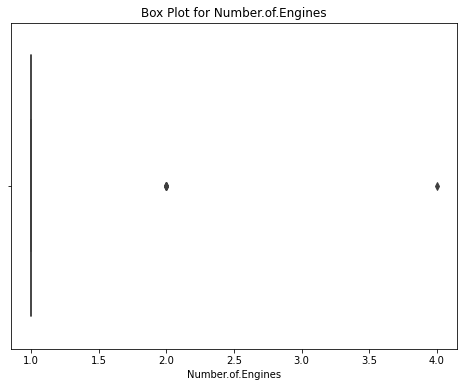

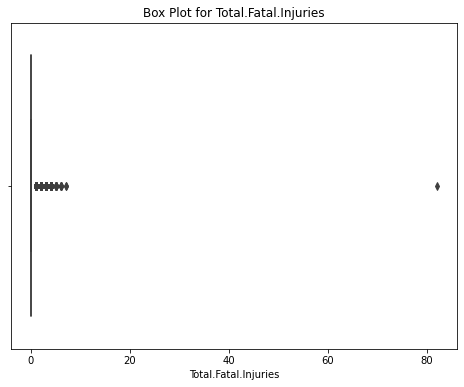

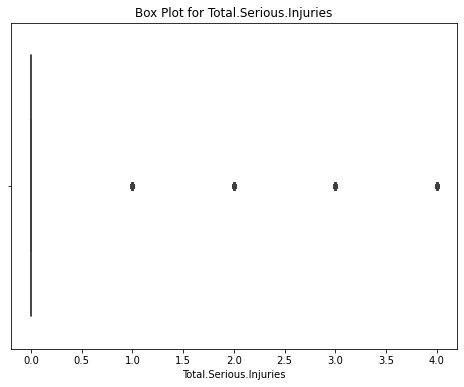

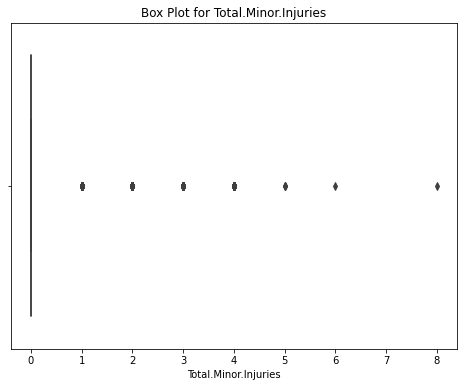

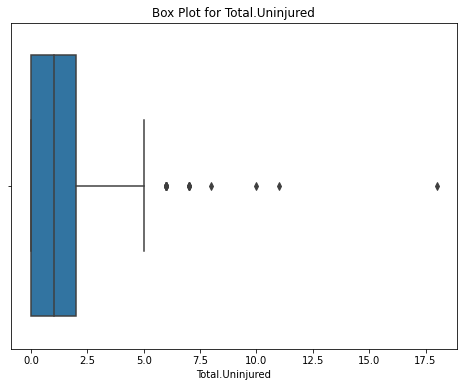

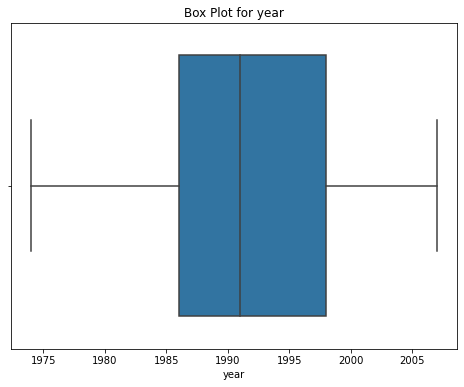

In [39]:
# List of numerical columns to look for outliers.
outlier_columns = ['Number.of.Engines', 'Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured', 'year']

# Create a box plot for each specified column
for column in outlier_columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=planes_of_interest[column])
    plt.title(f'Box Plot for {column}')
    plt.show()

Given the infomation about production for each model and the years currently in the dataframe, we decided to only examine airplane incidents from 1986 to current. This will account for any of the last Cessna 150/152 models that were produced. 

In [40]:
#Filtering by year
planes_of_interest = planes_of_interest[(planes_of_interest['year'] >= 1986)]

#Dropping this outlier in the total fatal injuries column
planes_of_interest = planes_of_interest[planes_of_interest['Total.Fatal.Injuries'] <= 70]

In [41]:
planes_of_interest.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9213 entries, 13710 to 63904
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Event.Date              9213 non-null   datetime64[ns]
 1   Location                9213 non-null   object        
 2   Country                 9213 non-null   object        
 3   Injury.Severity         9213 non-null   object        
 4   Aircraft.damage         9201 non-null   object        
 5   Aircraft.Category       9213 non-null   object        
 6   Make                    9213 non-null   object        
 7   Model                   9213 non-null   object        
 8   Amateur.Built           9213 non-null   object        
 9   Number.of.Engines       9203 non-null   float64       
 10  Engine.Type             9209 non-null   object        
 11  Purpose.of.flight       9213 non-null   object        
 12  Total.Fatal.Injuries    9213 non-null   flo

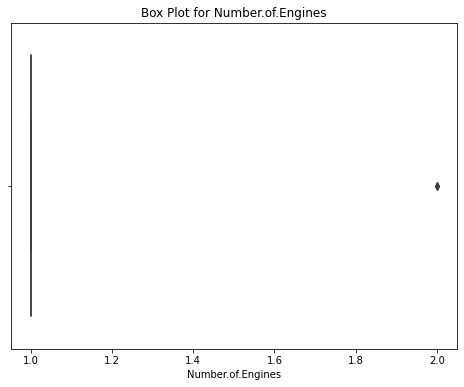

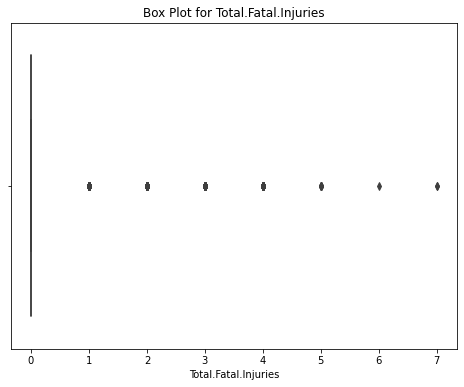

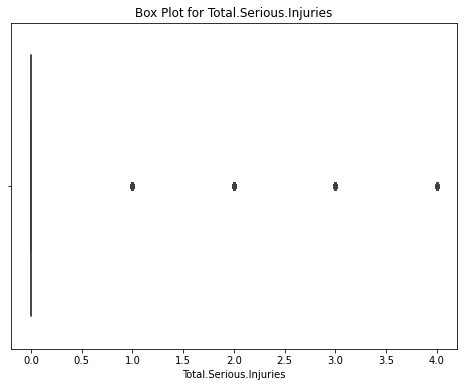

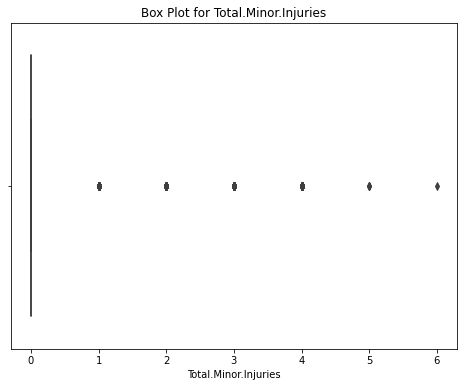

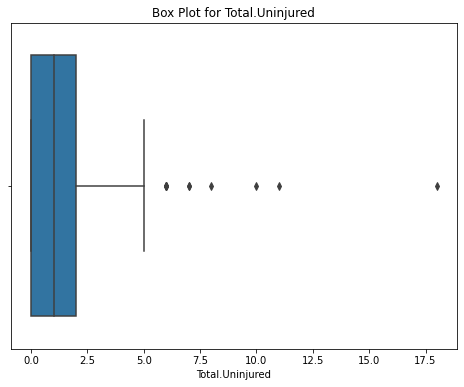

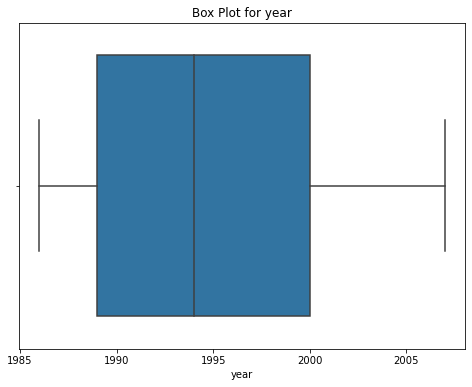

In [42]:
#Checking the numerical columns again to check for any other outliers.

# List of numerical columns to look for outliers.
outlier_columns = ['Number.of.Engines', 'Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured', 'year']

# Create a box plot for each specified column
for column in outlier_columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=planes_of_interest[column])
    plt.title(f'Box Plot for {column}')
    plt.show()

The Cessna 152 and 172 are single-engine planes, so I will change the value of number of engines to 1 to be consistent.

In [43]:
#Identifying Rows where the number of engines is equal to 2, and confirming the Make and model is consistent 
planes_of_interest[planes_of_interest['Number.of.Engines'] == 2]

#Reassinging the value to 1.
planes_of_interest.loc[planes_of_interest['Number.of.Engines'] == 2, 'Number.of.Engines'] = 1

## Feature Engineering

I created `Survivors` and `Total.People` to analyze the percentage of people who survived incidents in these aircraft.
I created `State` and `City` to create a heat map to analyze the number of Fatalities by State.

In [44]:
#Creating a column called survivors: Sum of all injury categories except for fatal.
planes_of_interest['Survivors'] = planes_of_interest['Total.Minor.Injuries'] + planes_of_interest['Total.Serious.Injuries'] +planes_of_interest['Total.Uninjured']

#Creating a column called Total.People, to show how many were involved in the accident.
planes_of_interest['Total.People'] = planes_of_interest['Survivors'] + planes_of_interest['Total.Fatal.Injuries']

In [45]:
# creating State and City variables for heat map in Tableau
planes_of_interest['State'] = planes_of_interest['Location'].str.split(',').str[-1].str.strip()
planes_of_interest['City'] = planes_of_interest['Location'].str.split(',').str[0].str.strip()

Saving the data frame to an Excel file for further analysis in Tableau.

In [46]:
planes_of_interest.to_excel('./Data/flight_data_tableau.xlsx')

## Analysis

### Number of Fatalities Year Over Year

Across the years 1986 to 2007, a notable reduction in the total number of fatalities is evident in airplane accidents involving the Cessna 150, Cessna 152, Cessna 172, and Piper PA-28 models. This positive trend reflects advancements in aviation safety practices and technology specific to these aircraft. Improved design features, avionics systems, and adherence to stringent safety regulations have collectively contributed to a safer operational environment. Pilot training programs, coupled with enhanced air traffic control systems, further underscore the commitment to mitigating risks and ensuring the well-being of individuals involved in aviation. While speculative, these positive developments align with the broader industry's continuous efforts to enhance safety measures and foster a culture of responsibility.

When comparing the four-seaters against each other over the years, the Cessna 172 had recorded fewer fatal injuries than the Piper Pa-28. As for the two-seater options, the Cessna 152 edges out its prior version, the Cessna 150, which should be expected with upgrades to the aircraft.   

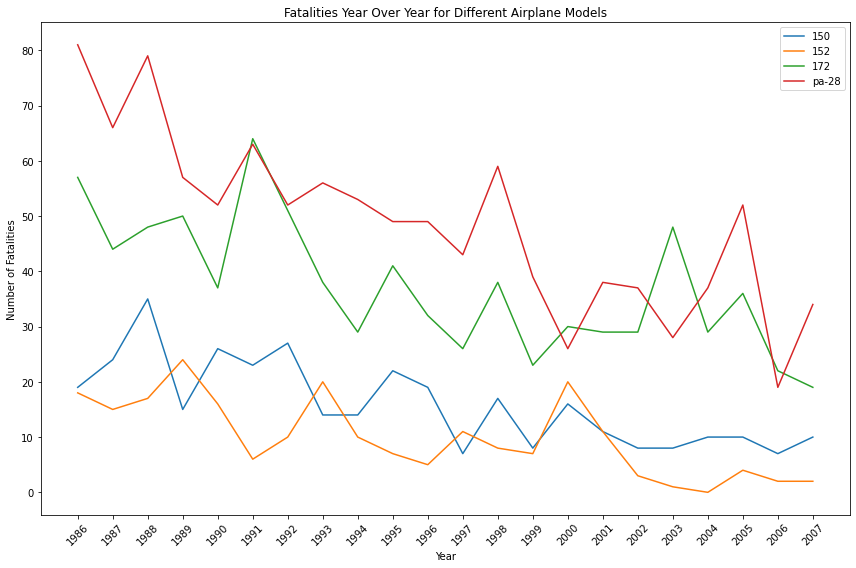

In [47]:
#Plot 1
models_of_interest = ['150', '152', '172', 'pa-28']

# Set the size of the figure
plt.figure(figsize=(12, 8))

# Iterate through each model and plot a line graph
for model in models_of_interest:
    model_data = planes_of_interest[planes_of_interest['model_new'] == model]
    yearly_fatalities = model_data.groupby('year')['Total.Fatal.Injuries'].sum()
    plt.plot(yearly_fatalities.index, yearly_fatalities, label=model)

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Number of Fatalities')
plt.title('Fatalities Year Over Year for Different Airplane Models')
plt.legend()

# Add evenly spaced tick marks between the years
min_year = 1986
max_year = 2007
plt.xticks(np.arange(min_year, max_year + 1, step=1), rotation=45)

# Set the facecolor to white
plt.gcf().set_facecolor('white')

# Adjust layout
plt.tight_layout()

# Save the figure with a white background
plt.savefig("./images/fatalities_YOY_by_model.png", dpi=150, facecolor='white')

# Display the plot
plt.show()

### Choosing a Plane Based on Fatality and Survival Percentages

The Cessna 152 stands out with the highest overall survival rate at 89.63%, indicating a relatively higher likelihood of passengers and crew surviving incidents. In contrast, the Piper pa-28 shows a slightly lower overall survival percentage at 79.90%, suggesting a comparatively lower average survival rate. The Cessna 150 and Cessna 172 fall within a similar range, both around 87%, indicating comparable safety performance. These brief observations highlight differences in safety outcomes among the selected aircraft models.

In [48]:
planes_of_interest['model_new'].value_counts()

172      3315
pa-28    2499
150      1919
152      1480
Name: model_new, dtype: int64

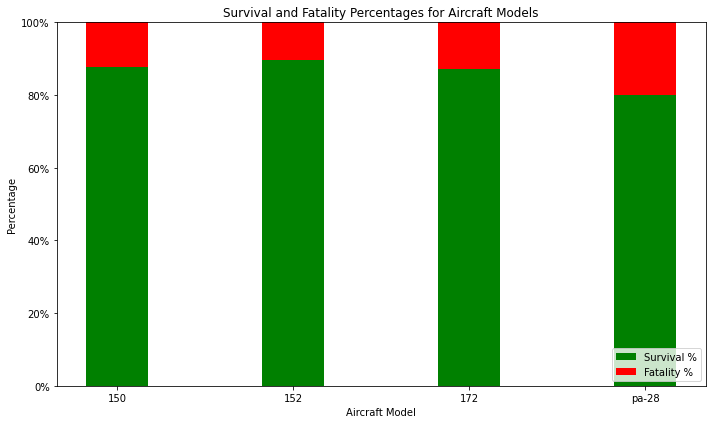

In [49]:
#Plot 2
models_of_interest = ['150', '152', '172', 'pa-28']

# Initialize lists to store data for plotting
survival_percentages = []
fatality_percentages = []

# Iterate through each model
for model in models_of_interest:
    # Filter data for the specific aircraft model
    filtered_data = planes_of_interest[planes_of_interest['model_new'] == model]

    # Calculate overall percentages
    total_survivors = filtered_data['Survivors'].sum()
    total_fatalities = filtered_data['Total.Fatal.Injuries'].sum()
    total_people = total_survivors + total_fatalities
    overall_survival_percentage = (total_survivors / total_people) * 100
    overall_fatality_percentage = 100 - overall_survival_percentage

    # Append percentages to the lists
    survival_percentages.append(overall_survival_percentage)
    fatality_percentages.append(overall_fatality_percentage)

# Set the size of the figure
plt.figure(figsize=(10, 6))
    
# Create a stacked bar chart
bar_width = 0.35
index = range(len(models_of_interest))

plt.bar(index, survival_percentages, label='Survival %', color='green', width=bar_width)
plt.bar(index, fatality_percentages, bottom=survival_percentages, label='Fatality %', color='red', width=bar_width)

# Add labels and title
plt.xlabel('Aircraft Model')
plt.ylabel('Percentage')
plt.title('Survival and Fatality Percentages for Aircraft Models')
plt.xticks(index, models_of_interest)

# Set y-axis ticks as percentages
plt.gca().yaxis.set_major_formatter(PercentFormatter(100))

# Ensure the y-axis limit is set to 100%
plt.ylim(0, 100)

# Place the legend in the bottom right corner
plt.legend(loc='lower right')

# Set the facecolor to white
plt.gcf().set_facecolor('white')

# Adjust layout
plt.tight_layout()

# Save the figure with a white background
plt.savefig("./images/doa_percent_by_model.png", dpi=150, facecolor='white')

# Display the plot
plt.show()

### Time of Year to Schedule Instructional and Personal Flights

The side-by-side comparison of fatalities in instructional and personal flights reveals distinct patterns in their occurrence throughout the year. Notably, instructional flights exhibit a considerably lower number of fatalities compared to personal flights. The instructional subset portrays a consistent safety trend, suggesting that flying is relatively safe year-round. February stands out with a slight increase, peaking at around 60 fatalities, but overall, instructional flights demonstrate a stable safety record.

On the contrary, the personal flight subset shows a different dynamic, with fatalities peaking during the summer months. April and August mark the highest points, indicating a correlation between the warmer seasons and an elevated number of fatalities in personal flights. Additionally, the winter months, from November to March, present the lowest number of observations, aligning with a decrease in flight activity during the colder periods. This side-by-side analysis provides valuable insights into the seasonal variations in aviation safety, emphasizing the need for tailored risk assessments based on flight purposes.

Based on this data, we should plan the stages of our students' flights around these time frames:
1. Instructional Flights: April through September.
2. Personal Flights: October through March. 

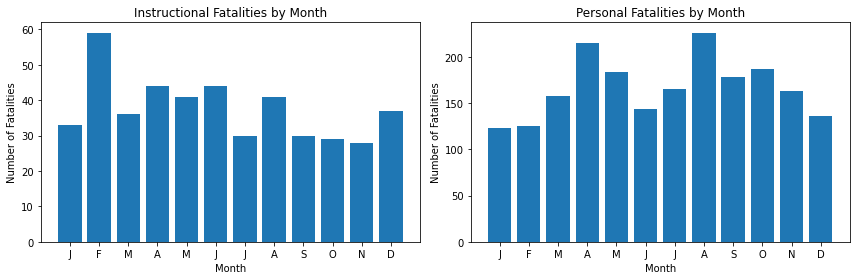

In [50]:
#Plot 3
# Define the order of months
month_order = [
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
]

# Filter data for instructional and personal flights
instructional_data = planes_of_interest[planes_of_interest['Purpose.of.flight'] == 'Instructional']
personal_data = planes_of_interest[planes_of_interest['Purpose.of.flight'] == 'Personal']

# Group by month and calculate the sum of fatalities
instructional_fatalities_by_month = instructional_data.groupby('month')['Total.Fatal.Injuries'].sum().loc[month_order]
personal_fatalities_by_month = personal_data.groupby('month')['Total.Fatal.Injuries'].sum().loc[month_order]

# Create plot
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

# Plot for instructional flights
axes[0].bar(instructional_fatalities_by_month.index, instructional_fatalities_by_month)
axes[0].set_title('Instructional Fatalities by Month')
axes[0].set_ylabel('Number of Fatalities')
axes[0].set_xlabel('Month')

# Replace x-axis labels with the first initial of each month
axes[0].set_xticklabels([month[:1] for month in instructional_fatalities_by_month.index])

# Plot for personal flights
axes[1].bar(personal_fatalities_by_month.index, personal_fatalities_by_month)
axes[1].set_title('Personal Fatalities by Month')
axes[1].set_ylabel('Number of Fatalities')
axes[1].set_xlabel('Month')

# Replace x-axis labels with the first initial of each month
axes[1].set_xticklabels([month[:1] for month in personal_fatalities_by_month.index])

# Set the facecolor to white
plt.gcf().set_facecolor('white')

# Adjust layout
plt.tight_layout()

# Save the figure with a white background
plt.savefig("./images/Total_Fatalities_by_Month.png", dpi=150, facecolor='white')

# Display the plot
plt.show()

### Survivors and Fatalities by State

The Tableau heatmap visual highlights a distinct pattern, indicating that the Midwest region consistently exhibits the lowest average number of fatalities compared to other continental U.S. regions. Additionally, the Midwest region stands out for having the highest average number of survivors, underscoring its positive safety record in aviation incidents. Given that the Cessna models demostrated a higher survival percentage compared to the Piper model, we only examined the Cessna models in this visual.

Click [here](https://public.tableau.com/views/AviationIncidentAnalysis/Dashboard1?:language=en-US&:display_count=n&:origin=viz_share_link) to view our interactive Tablaue dashboard.

![Tableau_heat_map.png](./images/tableau_visual-US_heatmap_doa.png)

## Conclusion

This analysis leads to four recommendations for starting our flight school business:

- **Invest in a Cessna model aircraft.** The Cessna 152 stands out with the highest overall survival rate at 89.63%, followed closely by the Cessna 150 and 172 at ~87%. The Piper pa-28 showed the lowest overall survival percentage at 79.90%. 
- **Pay a little extra for a newer model plane.** Technology has evolved drastically since the inception of all these models of interest, and it is clear that over the years these planes have shown themselves to be safer.
- **Tailored risk assessments for flight planning.** Instructional flights consistently maintain lower fatality rates throughout the year, with a minor peak in February, while personal flights show a distinct seasonal pattern, peaking in fatalities during summer months (April and August). Flight planning considerations suggest scheduling instructional flights year-round and personal flights, preferably from October to March.
- **Open first location somewhere in the midwest region.** the Midwest region consistently exhibits the lowest number of fatalities compared to other continental U.S. regions. Additionally, the Midwest region stands out for having the highest average number of survivors, underscoring its positive safety record in aviation incidents.

### Next Steps
Further analyses could yield additional insights to how we can further improve our flight schools saftey:

- **Determine the best location based on stakeholder preference.** We would need to explore real estate costs and then determine whether leasing or purchasing would be most ideal along with analyzing competition.
- **Determine overhead costs.** We would need to determine overhead costs such as planes, cost around employing experienced certified instructors, government regulations, and upkeep. Additional research around profit/loss/cost would need to be assessed along with understanding FAA requirements and exploring government regulations.
- **Analyze weather conditions in location choice.** We would need to further analyze how weather impacted fatalities in the seasons in order to determine when would be most ideal to promote instructional classes.